In [152]:
import pandas as pd
import numpy as np
import io
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [153]:
df = pd.read_csv('D:\WORK\CEG\Sixth Semester\SRP\All_Cities_Cleaned.csv')
print(df)

       seller_type  bedroom layout_type      property_type       locality  \
0            OWNER      2.0         BHK          Apartment       Bodakdev   
1            OWNER      1.0          RK   Studio Apartment        CG Road   
2            OWNER      3.0         BHK          Apartment        Jodhpur   
3            OWNER      2.0         BHK  Independent House         Sanand   
4            OWNER      2.0         BHK  Independent House    Navrangpura   
...            ...      ...         ...                ...            ...   
193006       OWNER      1.0         BHK          Apartment      Chinchwad   
193007       OWNER      1.0          RK   Studio Apartment  Wadgaon Sheri   
193008       OWNER      1.0         BHK          Apartment        Kothrud   
193009       AGENT      1.0         BHK          Apartment          Wakad   
193010       AGENT      2.0         BHK          Apartment         Alandi   

          price    area    furnish_type  bathroom       city  
0       2000

In [154]:
df.head(10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad
5,OWNER,1.0,BHK,Apartment,Vejalpur,8500.0,570.0,Unfurnished,1.0,Ahmedabad
6,OWNER,1.0,RK,Studio Apartment,Jivraj Park,6000.0,180.0,Semi-Furnished,1.0,Ahmedabad
7,OWNER,2.0,BHK,Apartment,Nikol,12000.0,1200.0,Semi-Furnished,2.0,Ahmedabad
8,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad
9,OWNER,4.0,BHK,Independent House,Maninagar,38500.0,3500.0,Furnished,4.0,Ahmedabad


In [155]:
df.shape

(193011, 10)

In [156]:
df['price_per_sqft']=df['price']/df['area']
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,price_per_sqft
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,13.793103
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,35.000000
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,11.578947
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,10.116732
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,11.250000


In [157]:
(df.city.unique())

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai', 'Pune'], dtype=object)

In [158]:
len(df.locality.unique())

4146

In [159]:
#Sorting the localities based on no. of occureneces in non-increasing order

df.locality=df.locality.apply(lambda x: x.strip())
location=df.groupby('locality')['locality'].agg('count').sort_values(ascending=False)
location

locality
Thane West                        4478
Chembur                           3549
Andheri East                      3415
Bopal                             2933
Kharghar                          2614
                                  ... 
Byraveshwara Industrial Estate       1
Pan Card Club Road                   1
Palm Beach                           1
CBCID Colony                         1
1 Sector Number 3 Road               1
Name: locality, Length: 4146, dtype: int64

In [160]:
#Counting no. of localities that have less than 10 occurence

len(location[location<=10])

2911

In [161]:
#Displaying list of localities that occur less than 10 times

locality_less_than_10=location[location<=10]
locality_less_than_10

locality
maharshi nagar                    10
Pimpri Chinchwad                  10
Vashi Kopar Khairane Road         10
Vandalur                          10
Serampore                         10
                                  ..
Byraveshwara Industrial Estate     1
Pan Card Club Road                 1
Palm Beach                         1
CBCID Colony                       1
1 Sector Number 3 Road             1
Name: locality, Length: 2911, dtype: int64

In [162]:
len(df.locality.unique())

4146

In [163]:
df.locality=df.locality.apply(lambda x:'other' if x in locality_less_than_10 else x)
len(df.locality.unique())

1236

In [164]:
df.sample(n=10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,price_per_sqft
55906,AGENT,2.0,BHK,Independent Floor,Lajpat Nagar,30000.0,960.0,Furnished,2.0,Delhi,31.250000
41555,OWNER,2.0,BHK,Apartment,T Nagar,22000.0,900.0,Semi-Furnished,2.0,Chennai,24.444444
93359,OWNER,2.0,BHK,Independent House,other,10000.0,750.0,Semi-Furnished,1.0,Kolkata,13.333333
19305,OWNER,1.0,RK,Studio Apartment,Subramanyapura,4500.0,150.0,Semi-Furnished,1.0,Bangalore,30.000000
158549,OWNER,2.0,BHK,Apartment,Mira Road East,15000.0,770.0,Semi-Furnished,2.0,Mumbai,19.480519
133112,AGENT,1.0,RK,Studio Apartment,Lower Parel,15000.0,300.0,Semi-Furnished,1.0,Mumbai,50.000000
128785,AGENT,3.0,BHK,Apartment,Thane West,28000.0,1150.0,Unfurnished,2.0,Mumbai,24.347826
39141,OWNER,2.0,BHK,Apartment,Kogilu,15000.0,1070.0,Semi-Furnished,2.0,Bangalore,14.018692
190892,OWNER,1.0,BHK,Apartment,Pimple Gurav,12500.0,600.0,Unfurnished,1.0,Pune,20.833333
131984,AGENT,2.0,BHK,Apartment,Panvel,12000.0,1070.0,Unfurnished,2.0,Mumbai,11.214953


In [165]:
#Outlier Removal

df.shape

(193011, 11)

In [166]:
#Removing illogical cases by removing entries with bedroom area less than 300sqft

df_new=df[~(df.area/df.bedroom<300)]
df_new.shape

(187676, 11)

In [167]:
df_new.price_per_sqft.describe()

count    187676.000000
mean         29.178102
std          24.032645
min           4.000000
25%          14.831717
50%          20.833333
75%          34.722222
max         400.000000
Name: price_per_sqft, dtype: float64

In [168]:
#Function to remove entries with extreme boundary values based on the assumption that the dataset should have a normal distribution.
#More than 68% of the dataentries should be within one standard deviation from the mean.
#Filtering values which are beyond one standard deviation

def remove_pps_outliers(dataframe):
    df_clean=pd.DataFrame()
    for key,subdf in dataframe.groupby('locality'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft> (m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_clean = pd.concat([df_clean, reduced_df], ignore_index=True)
    return df_clean
    
df_wout = remove_pps_outliers(df_new)
df_wout.shape

(145942, 11)

In [169]:
#Applying the same function to remove price_per_sqft outliers by grouping the datapoints based on their cities

def remove_pps_outliers_city(dataframe):
    df_clean=pd.DataFrame()
    for key,subdf in dataframe.groupby('city'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft> (m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_clean = pd.concat([df_clean, reduced_df], ignore_index=True)
    return df_clean
    
df_city = remove_pps_outliers_city(df_wout)
df_city.shape

(106870, 11)

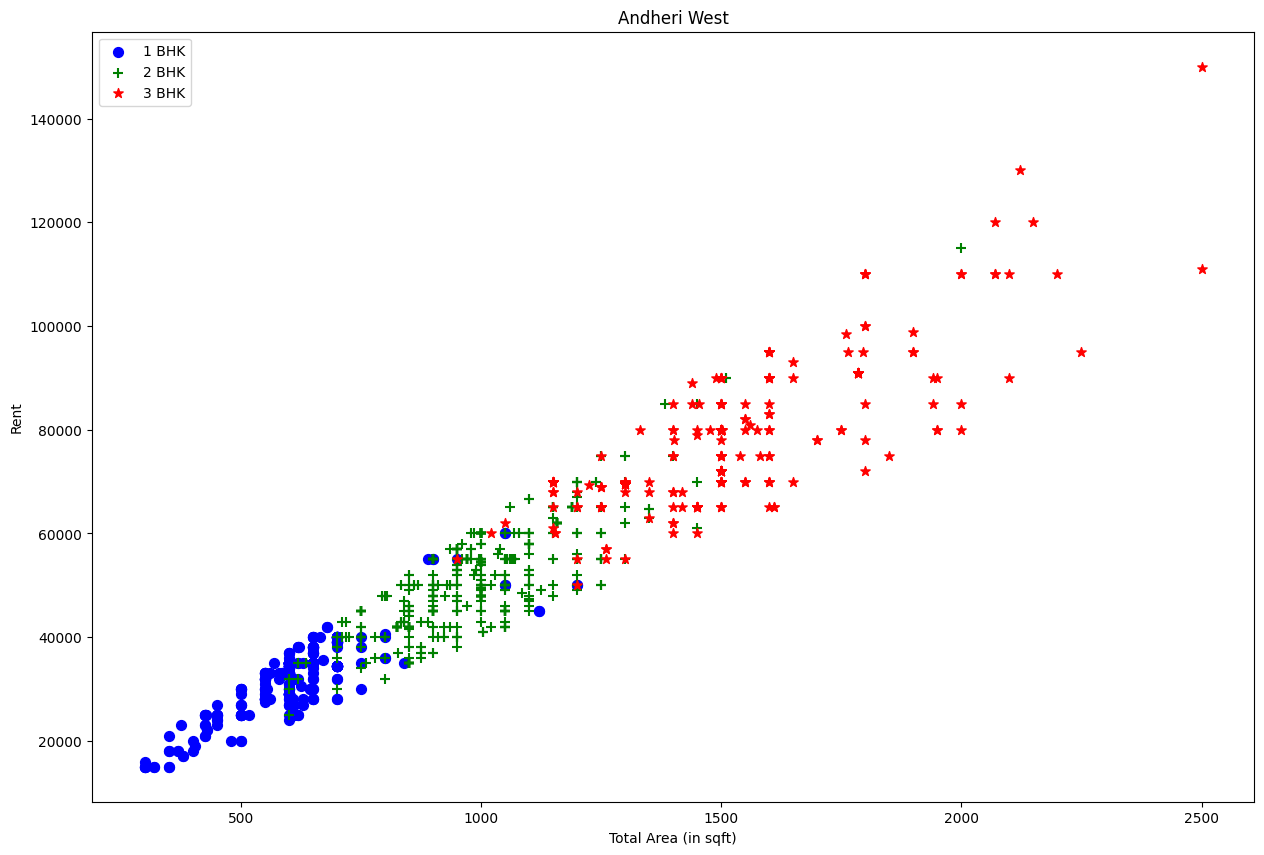

In [170]:
#Scatter plot of properties in Andheri West to visualize the bedroom based outliers
#Note that the rent price of properties with more bedrooms are lesser than the properties with lesser bedrooms in some cases
#Although there can be several microscopic reasons for the same, these outliers need to be removed to maintain a normal distribution

def plot_scatter_chart(dataframe, locality):
    bhk1 = dataframe[(dataframe.locality == locality) & (dataframe.bedroom == 1.0)]
    bhk2 = dataframe[(dataframe.locality == locality) & (dataframe.bedroom == 2.0)]
    bhk3 = dataframe[(dataframe.locality == locality) & (dataframe.bedroom == 3.0)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk1.area, bhk1.price, color='blue', label='1 BHK', s=50)
    plt.scatter(bhk2.area, bhk2.price, marker='+', color='green', label='2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.price, marker='*', color='red', label='3 BHK', s=50)
    plt.xlabel("Total Area (in sqft)")
    plt.ylabel("Rent")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df_city, "Andheri West")

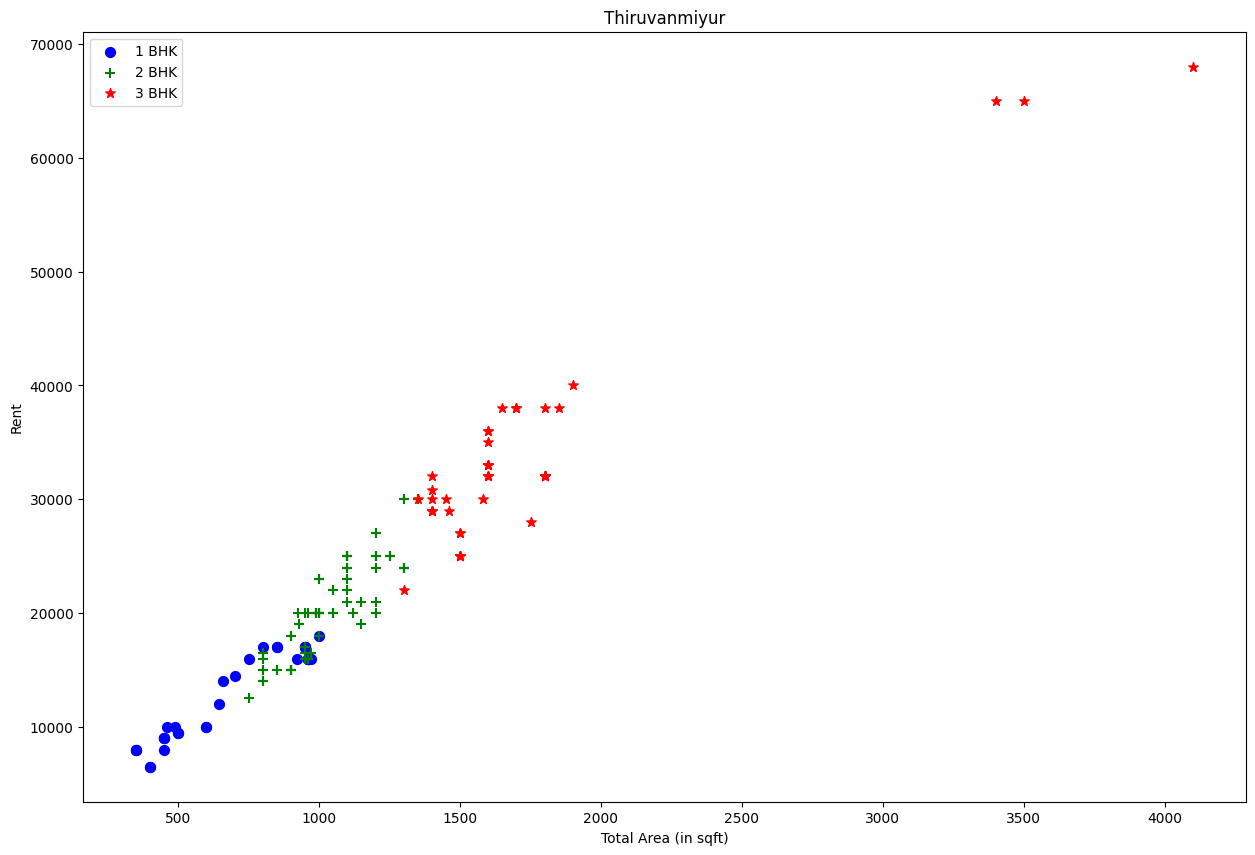

In [171]:
def plot_scatter_chart(dataframe, locality):
    bhk1 = dataframe[(dataframe.locality == locality) & (dataframe.bedroom == 1.0)]
    bhk2 = dataframe[(dataframe.locality == locality) & (dataframe.bedroom == 2.0)]
    bhk3 = dataframe[(dataframe.locality == locality) & (dataframe.bedroom == 3.0)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk1.area, bhk1.price, color='blue', label='1 BHK', s=50)
    plt.scatter(bhk2.area, bhk2.price, marker='+', color='green', label='2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.price, marker='*', color='red', label='3 BHK', s=50)
    plt.xlabel("Total Area (in sqft)")
    plt.ylabel("Rent")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df_city,"Thiruvanmiyur")

In [172]:
#Removing all dataentries where the price is less than the mean price for a property which has one bedroom lesser and is situated in the same locality
#For example, removing dataentries where the rent of a 3BHK property is less than the mean rent of a 2BHK property in the same locality to remove outliers

def remove_bedroom_outliers(dataframe):
    exclude_indices = np.array([])
    for locality, locality_df in dataframe.groupby('locality'):
        bhk_data = {}
        for bedroom, bhk_df in locality_df.groupby('bedroom'):
            bhk_data[bedroom] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'sd': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bedroom, bhk_df in locality_df.groupby('bedroom'):
            stats = bhk_data.get(bedroom-1)
            if stats and stats['count']>1:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df_bedroom = remove_bedroom_outliers(df_city)
df_bedroom.shape

(152816, 11)

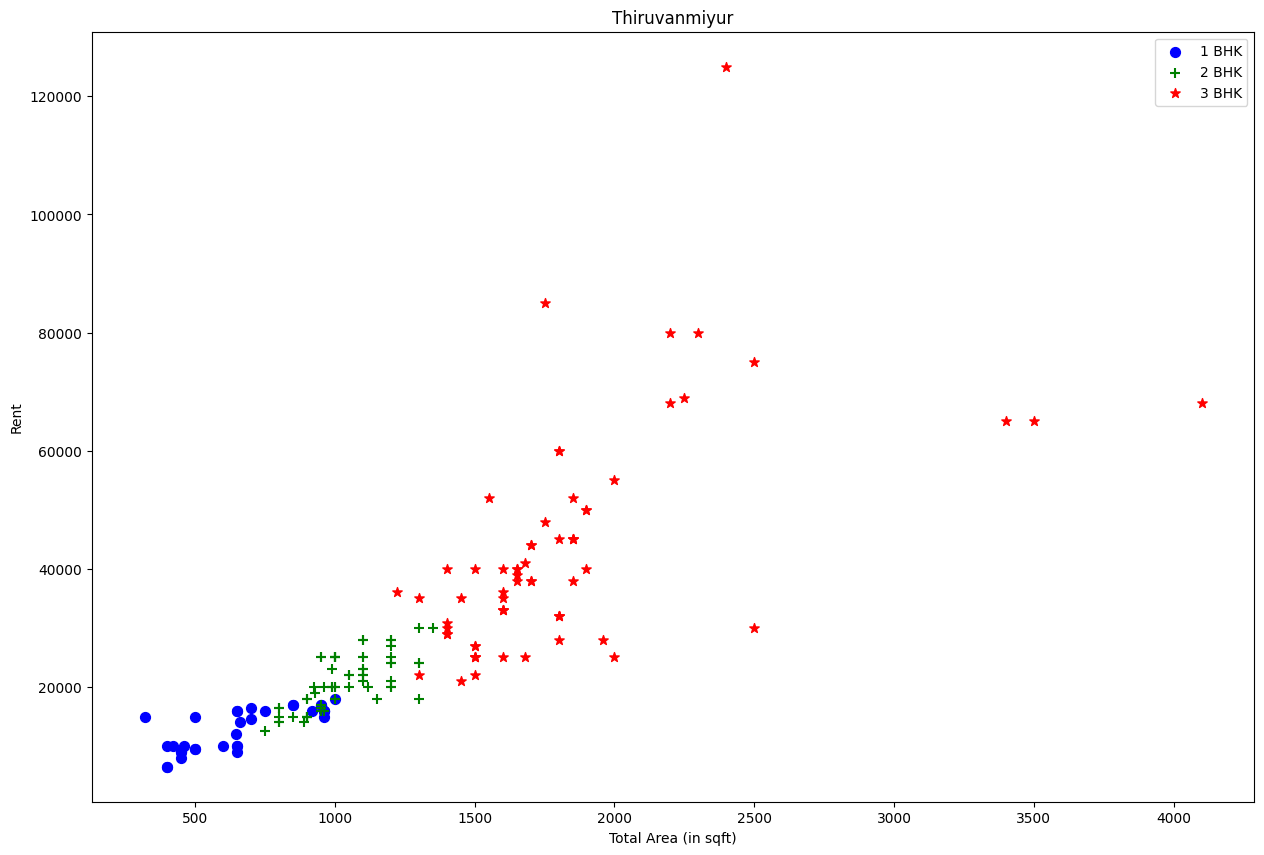

In [173]:
plot_scatter_chart(df_bedroom, "Thiruvanmiyur")

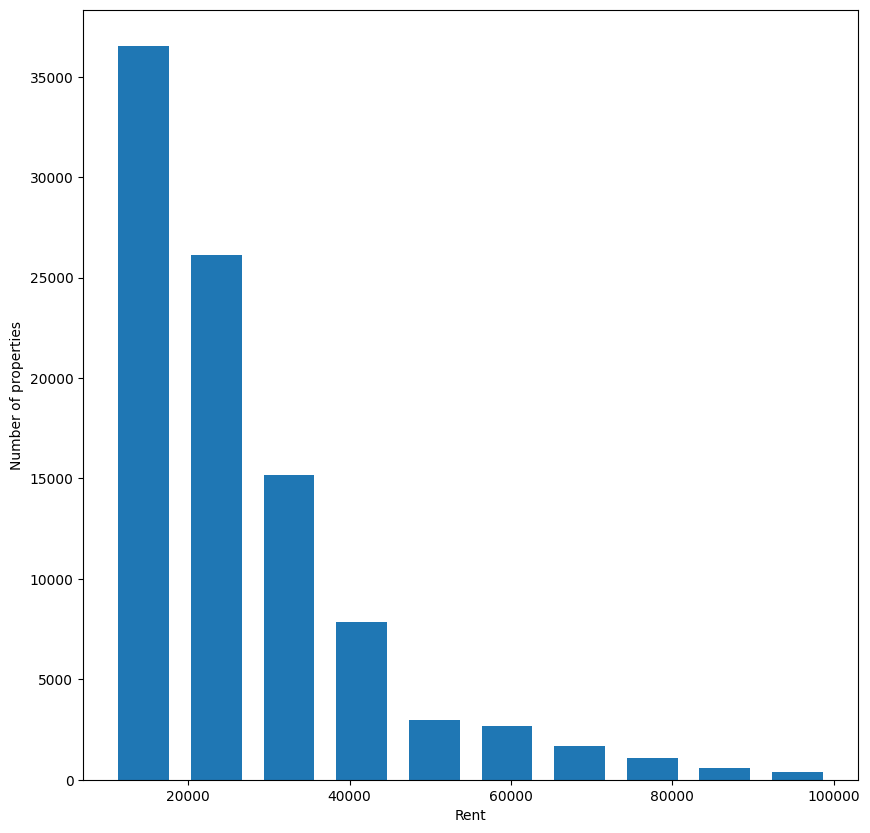

In [174]:
matplotlib.rcParams['figure.figsize'] = (10, 10)
plt.hist(df_city.price, rwidth=0.7, range=[10000, 100000], bins=10)
plt.xlabel("Rent")
plt.ylabel("Number of properties")
plt.show()

In [175]:
df_city.bathroom.unique()

array([ 3.,  2.,  1.,  5.,  4.,  6.,  7.,  9.,  8., 10.])

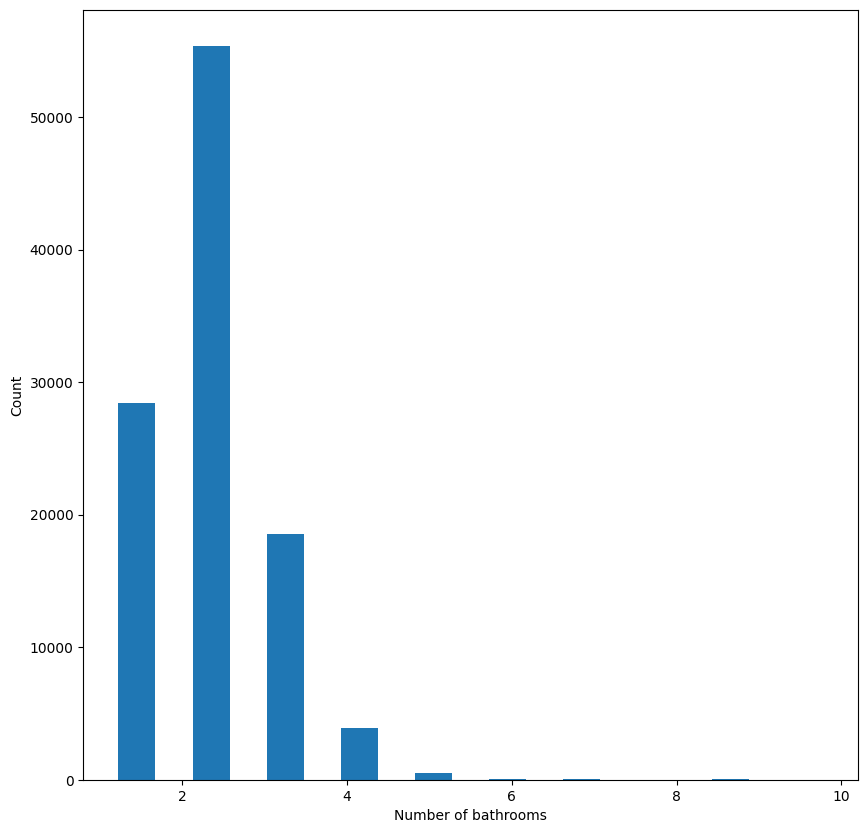

In [176]:
plt.hist(df_city.bathroom, rwidth=0.5, bins=10)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [177]:
#Identifying dataentries where the number of bathrooms is more than the number of bedrooms+2
#with the basic logic that these situations are highly unlikely

df_city[df_city.bathroom>df_city.bedroom + 2]

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,price_per_sqft
6777,AGENT,2.0,BHK,Apartment,Prahlad Nagar,25000.0,1930.0,Unfurnished,5.0,Ahmedabad,12.953368
6907,AGENT,4.0,BHK,Apartment,Prahlad Nagar,40000.0,2700.0,Semi-Furnished,7.0,Ahmedabad,14.814815
7352,AGENT,3.0,BHK,Apartment,Satellite,23000.0,1900.0,Semi-Furnished,6.0,Ahmedabad,12.105263
12328,AGENT,3.0,BHK,Independent Floor,Domlur Layout,31000.0,1450.0,Semi-Furnished,6.0,Bangalore,21.379310
14150,OWNER,3.0,BHK,Apartment,Hoodi,23000.0,1450.0,Semi-Furnished,6.0,Bangalore,15.862069
16220,OWNER,2.0,BHK,Independent House,Kaval Byrasandra,19000.0,1200.0,Semi-Furnished,5.0,Bangalore,15.833333
16653,OWNER,2.0,BHK,Apartment,Krishnarajapura,23000.0,1455.0,Furnished,5.0,Bangalore,15.807560
18460,AGENT,2.0,BHK,Independent Floor,Nagarbhavi,18000.0,1250.0,Semi-Furnished,5.0,Bangalore,14.400000
18462,AGENT,3.0,BHK,Independent Floor,Nagarbhavi,29750.0,1750.0,Semi-Furnished,6.0,Bangalore,17.000000
18482,AGENT,2.0,BHK,Independent Floor,Nagarbhavi,18000.0,1250.0,Semi-Furnished,5.0,Bangalore,14.400000


In [178]:
#Removing the outliers which are identified in the above condition

ds = df_city[df_city.bathroom < df_city.bedroom + 2]
ds.shape

(106580, 11)

In [179]:
df_dr6 = ds.drop(['seller_type', 'property_type', 'city', 'price_per_sqft', 'layout_type', 'furnish_type'], axis='columns')
'''df_dr2 = df_dr1.drop(['seller_type'], axis='columns')
df_dr3 = df_dr2.drop(['property_type'], axis='columns')
df_dr4 = df_dr3.drop(['city'], axis='columns')
df_dr5 = df_dr4.drop(['layout_type'], axis='columns')
df_dr6 = df_dr5.drop(['furnish_type'], axis='columns')'''
df_dr6.shape
df_dr6.sample(n=7)

,bedroom,locality,price,area,bathroom
106357,3.0,Yerawada,32000.0,1650.0,2.0
64853,3.0,Chembur,59965.0,1432.0,3.0
7247,2.0,Satellite,17000.0,1210.0,1.0
28548,1.0,Defence Colony,70000.0,1500.0,2.0
43148,3.0,South Extension 2,70000.0,1953.0,3.0
82912,2.0,Nerul,45000.0,1275.0,2.0
16851,2.0,Kumaraswamy Layout,10500.0,600.0,2.0


In [180]:
#One Hot Encoding - Convert text column to numerical column

dummies = pd.get_dummies(df_dr6.locality)
dummies.tail(7)

,5th Phase,AS Rao Nagar,Abbigere,Abids,Abul Fazal Enclave Jamia Nagar,Adambakam,Adarsh Nagar,Adikmet,Adugodi,Adyar,...,raheja vihar,raidurgam,rohini sector 5,sahakara nagar,salt lake sec iii,south dum dum,tambaram west,thakur village kandivali east,vikaspuri,vile parle west
106863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
df_final = pd.concat([df_dr6, dummies.drop('other', axis='columns')], axis='columns')
df_final.sample(n=7)

,bedroom,locality,price,area,bathroom,5th Phase,AS Rao Nagar,Abbigere,Abids,Abul Fazal Enclave Jamia Nagar,...,raheja vihar,raidurgam,rohini sector 5,sahakara nagar,salt lake sec iii,south dum dum,tambaram west,thakur village kandivali east,vikaspuri,vile parle west
10561,2.0,Banaswadi,12000.0,600.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68465,1.0,Ghansoli,15000.0,550.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41816,3.0,Sector 6 Dwarka,25000.0,1200.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105869,1.0,Wakad,7500.0,410.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16462,2.0,Koramangala,25000.0,1100.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72767,2.0,Kalyan West,24000.0,1100.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98917,1.0,Katraj,10000.0,570.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df_final1 = df_final.drop(['locality'], axis='columns')
df_final1.head(2)

,bedroom,price,area,bathroom,5th Phase,AS Rao Nagar,Abbigere,Abids,Abul Fazal Enclave Jamia Nagar,Adambakam,...,raheja vihar,raidurgam,rohini sector 5,sahakara nagar,salt lake sec iii,south dum dum,tambaram west,thakur village kandivali east,vikaspuri,vile parle west
0,3.0,30000.0,2100.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,30000.0,2100.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df_final1.shape

(106580, 1126)

In [199]:
X = df_final1.drop(['price'], axis='columns')
X.head()

,bedroom,area,bathroom,5th Phase,AS Rao Nagar,Abbigere,Abids,Abul Fazal Enclave Jamia Nagar,Adambakam,Adarsh Nagar,...,raheja vihar,raidurgam,rohini sector 5,sahakara nagar,salt lake sec iii,south dum dum,tambaram west,thakur village kandivali east,vikaspuri,vile parle west
0,3.0,2100.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2100.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2100.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2100.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1800.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
X.shape

(106580, 1125)

In [201]:
y = df_final1.price
y.head()

0    30000.0
1    30000.0
2    30000.0
3    30000.0
4    30000.0
Name: price, dtype: float64

In [202]:
len(y)

106580

# Model Creation

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [207]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

-553852956111.9755

In [142]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-2.91919600e+12, -1.00781450e+13, -6.61131414e+13, -8.04540376e+10,
       -7.89172934e+12])

In [208]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [143]:
def predict_price(locality, bedroom, area, bathroom):    
    loc_index = np.where(X.columns==locality)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedroom
    x[1] = area
    x[2] = bathroom
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [144]:
predict_price('Egmore', 2, 1000, 2)

C:\Users\Jayenth\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9717.145446466064